In [9]:
from utils import *

In [154]:
%matplotlib inline

In [3]:
# Load the Data for given time interval [0 -> 988] 
i_start = 0
i_end = 988
mydict = load_data(i_start, i_end)
print('Number of Locations : ' ,mydict[i_start].GetLocations().shape[0])


Number of Locations :  100040


In [236]:
# Crop the Space with given limits
crop_data(mydict,
          min_x=-10, max_x=10,
          min_y=-10, max_y=10,
          min_z=0,max_z=30
         )
print('Number of Locations after croping : ' ,mydict[i_start].GetLocations().shape[0])

Number of Locations after croping :  1087


In [29]:
mydict[i_start].GetFieldNames()

['Pressure', 'Tracer', 'TracerBackground', 'Time', 'Velocity']

In [84]:
mydict[i_end].GetField('Time')

array([[494.],
       [494.],
       [494.],
       ...,
       [494.],
       [494.],
       [494.]])

## Locations

In [169]:
locations_df = pd.DataFrame(mydict[i_end].GetLocations())
locations_df.head()

,0,1,2
0,-359.684633,-338.12365,250.0
1,359.684633,-338.12365,250.0
2,359.684633,338.12365,250.0
3,-359.684633,338.12365,250.0
4,7.701944,-338.12365,250.0


## Tracer :

In [48]:
tracer_mat = to_matrix(mydict,'Tracer')
tracer_mat.shape

(100040, 989)

In [49]:
tracer_df = pd.DataFrame(tracer_mat.T)


In [89]:
mean = tracer_df.iloc[:,:100000].mean(axis=1)
std = tracer_df.iloc[:,:100000].std(axis=1)

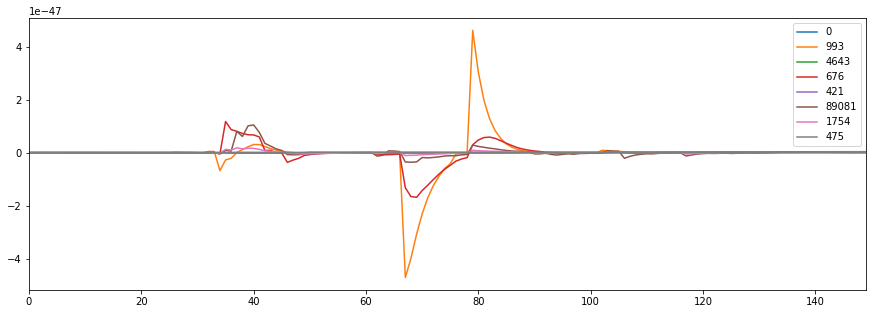

In [156]:
central_point = 0
next_points = mydict[i_start].GetPointPoints(central_point)

tracer_df.iloc[:150,next_points].plot(figsize=(15,5));

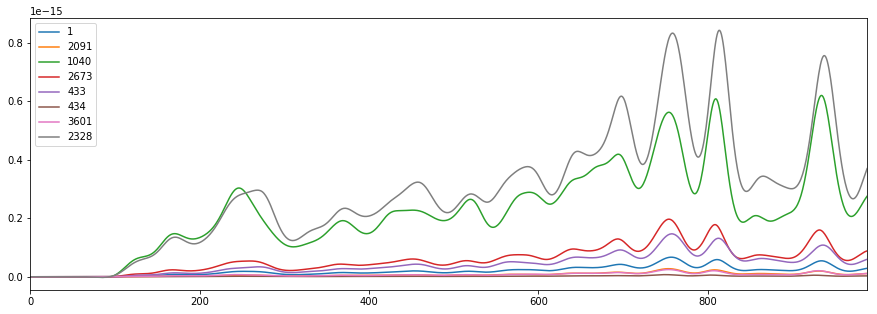

In [145]:
central_point = 1
next_points = mydict[i_start].GetPointPoints(central_point)

tracer_df.iloc[:,next_points].plot(figsize=(15,5));

## Tracer Background

In [36]:
tracerB_mat = to_matrix(mydict,'TracerBackground')
tracerB_mat.shape

(100040, 989)

In [37]:
tracerB_df = pd.DataFrame(tracerB_mat.T)


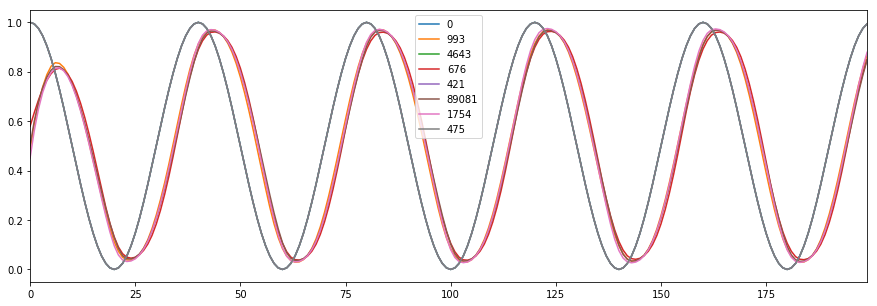

In [115]:
central_point = 0
next_points = mydict[i_start].GetPointPoints(central_point)

tracerB_df.iloc[:200,next_points].plot(figsize=(15,5));

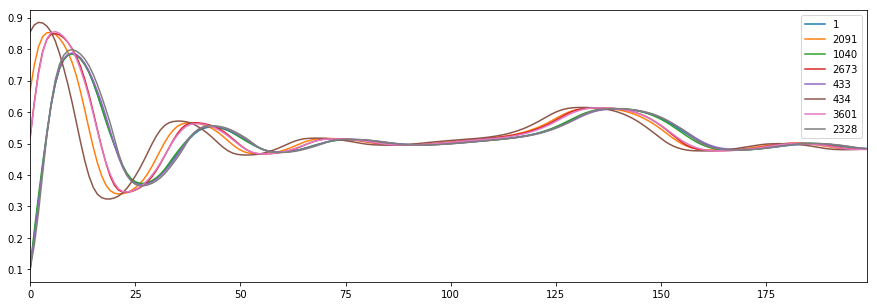

In [116]:
central_point = 1
next_points = mydict[i_start].GetPointPoints(central_point)

tracerB_df.iloc[:200,next_points].plot(figsize=(15,5));

In [91]:
mean = tracerB_df.iloc[:,:100000].mean(axis=1)
std = tracerB_df.iloc[:,:100000].std(axis=1)

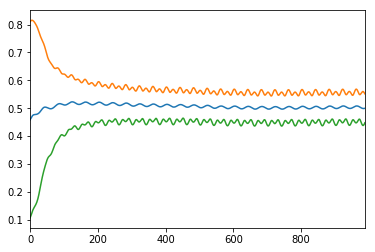

In [92]:
mean.plot();
(mean + std).plot()
(mean - std).plot()

<IPython.core.display.Javascript object>


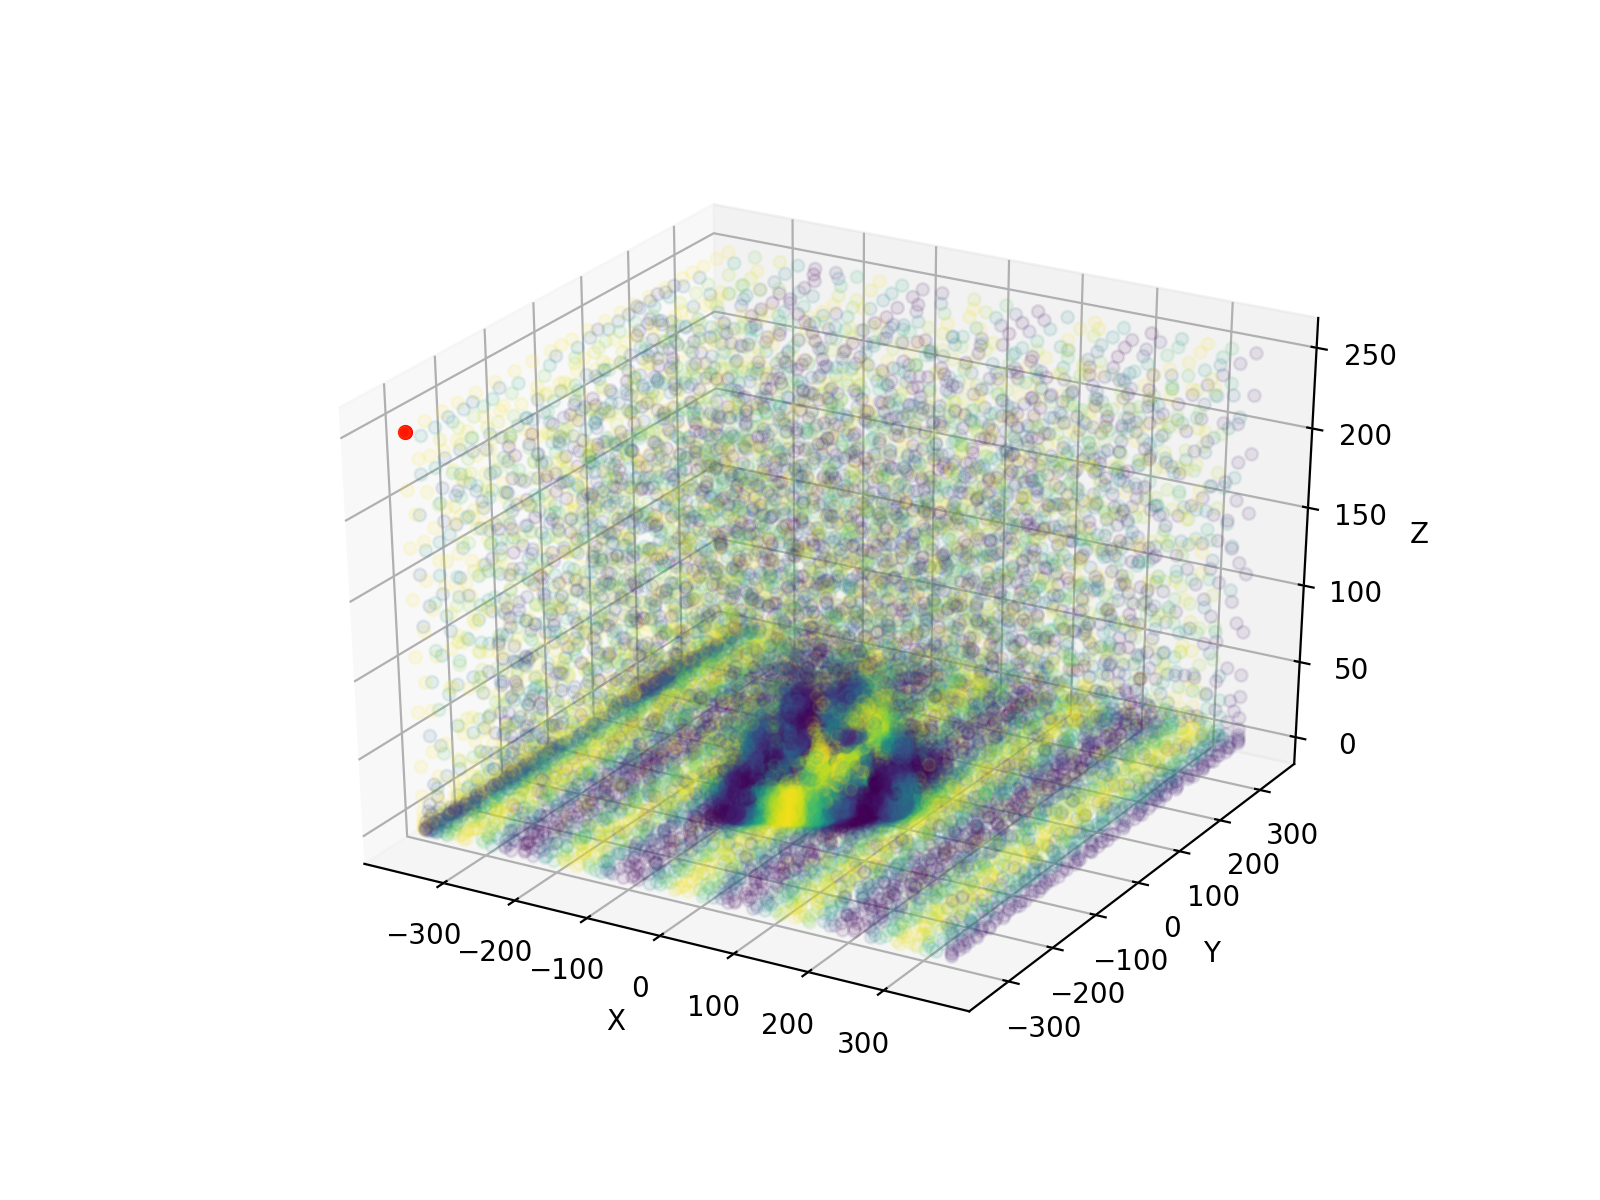

In [168]:
%matplotlib notebook
t = 10
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

locations = mydict[i_start].GetLocations()
marker = tracerB_df.iloc[0,:].values
ax.scatter(locations[:,0], locations[:,1], locations[:,2], c=marker,alpha=0.1)

interest_point = mydict[i_start].GetLocations
ax.scatter(locations[interest_point,0], locations[interest_point,1], locations[interest_point,2], c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## Pressure

In [51]:
pressure_mat = to_matrix(mydict,'Pressure')
pressure_mat.shape


(100040, 989)

In [52]:
pressure_df = pd.DataFrame(pressure_mat.T)


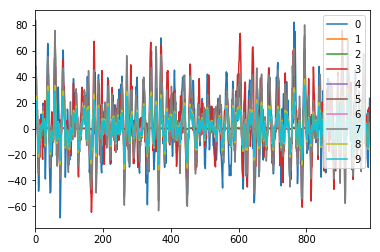

In [165]:
%matplotlib inline
pressure_df.iloc[:,:10].plot()

## Velocity

In [55]:
velocity_mat = mydict[i_start].GetField('Velocity')
velocity_mat


array([[10.39532129,  0.        ,  0.        ],
       [ 9.8796401 ,  0.        ,  0.        ],
       [ 9.8796401 ,  0.        ,  0.        ],
       ...,
       [ 8.62842496,  0.        ,  0.        ],
       [ 8.50199851,  0.        ,  0.        ],
       [ 8.32060426,  0.        ,  0.        ]])

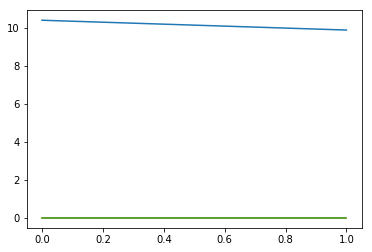

In [66]:
plt.plot(velocity_mat[:2,:]);

In [51]:
pressure_mat = to_matrix(mydict,'Pressure')
pressure_mat.shape


(100040, 989)

In [52]:
pressure_df = pd.DataFrame(pressure_mat.T)


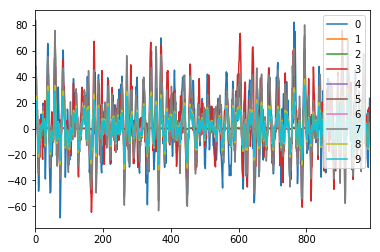

In [70]:
pressure_df.iloc[:,:10].plot();